In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
car_data = pd.read_csv('car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
## Statistical data of our numeric data in our dataset 
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
print(car_data['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [9]:
print(car_data['Seller_Type'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [10]:
print(car_data['Transmission'].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [11]:
fuel_type = car_data['Fuel_Type']
seller_type = car_data['Seller_Type']
transmission_type = car_data['Transmission']
selling_price = car_data['Selling_Price']

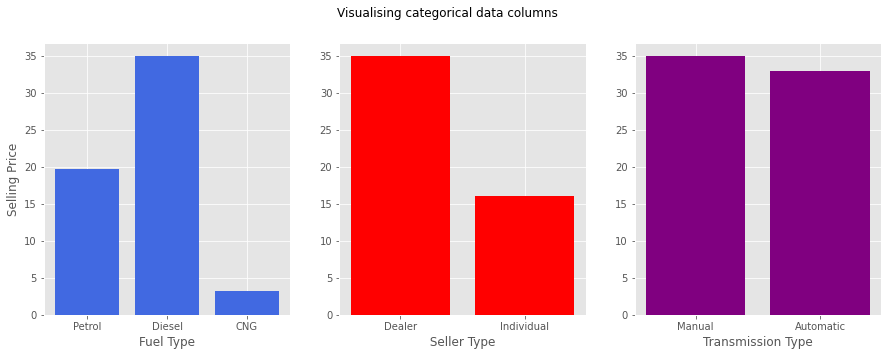

In [12]:
style.use('ggplot')

fig = plt.figure(figsize=(15,5))

fig.suptitle('Visualising categorical data columns ') 
plt.subplot(1,3,1)
plt.bar(fuel_type , selling_price , color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")

plt.subplot(1,3,2)

plt.bar(seller_type,selling_price,color='red')
plt.xlabel(" Seller Type ")
plt.subplot(1,3,3)

plt.bar(transmission_type,selling_price,color='purple')

plt.xlabel("Transmission Type")

plt.show()

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

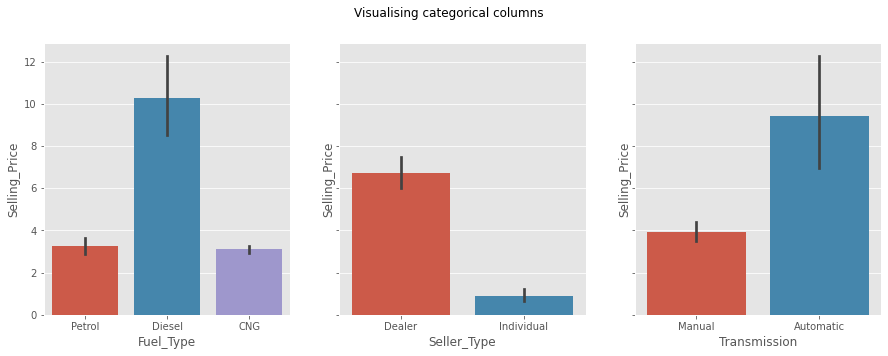

In [13]:
# fig , axes = plt.subplots(1,3,figsize(15,5), sharey=True)

fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle('Visualising categorical columns')

sns.barplot(x=fuel_type , y= selling_price, ax = axes[0])
sns.barplot(x=seller_type , y= selling_price , ax=axes[1])
sns.barplot(x=transmission_type , y=selling_price , ax= axes[2])


In [14]:
petrol_data = car_data.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [25]:
car_data.shape

(301, 9)

In [20]:
### Manually encoding 

car_data.replace({'Fuel_Type':{'Petrol':0 , 'Diesel' : 1 , 'CNG':2 }} , inplace=True)

## One Hot Encoding 

car_data = pd.get_dummies(car_data , columns=['Seller_Type', 'Transmission'] , drop_first=True)

In [21]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


In [24]:
car_data.shape

(301, 9)

<AxesSubplot:>

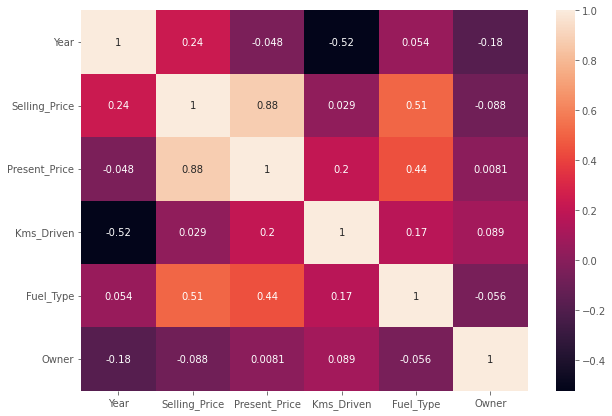

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(car_data.corr(), annot = True)

<AxesSubplot:title={'center':'Correlation between present price and the selling price '}, xlabel='Present_Price', ylabel='Selling_Price'>

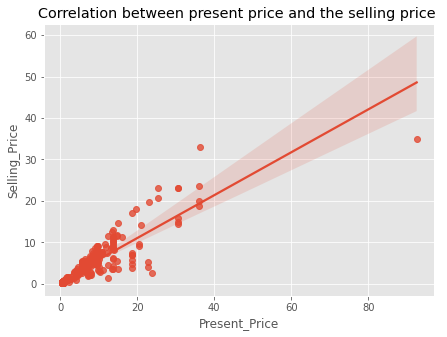

In [18]:
fig = plt.figure(figsize=(7,5))
plt.title("Correlation between present price and the selling price ")
sns.regplot(x = "Present_Price" , y = "Selling_Price" , data = car_data)

In [78]:
## Now the prediction comes into play 
# For y axis we will take selling_price

y = car_data['Selling_Price']
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)

print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Owner  \
0    2014           5.59       27000          0      0   
1    2013           9.54       43000          1      0   
2    2017           9.85        6900          0      0   
3    2011           4.15        5200          0      0   
4    2014           6.87       42450          1      0   
..    ...            ...         ...        ...    ...   
296  2016          11.60       33988          1      0   
297  2015           5.90       60000          0      0   
298  2009          11.00       87934          0      0   
299  2017          12.50        9000          1      0   
300  2016           5.90        5464          0      0   

     Seller_Type_Individual  Transmission_Manual  
0                         0                    1  
1                         0                    1  
2                         0                    1  
3                         0                    1  
4                         0                    1

In [79]:
X_train,X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

### Now to do the standardisation of the data  for that we would use StandardScalar() method for

In [80]:
scaler = StandardScaler()

In [81]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
model = LinearRegression()

In [83]:
model.fit(X_train,y_train)

LinearRegression()

In [84]:
pred = model.predict(X_test)

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute  Error ",(metrics.mean_absolute_error(pred,Y_test)))

Mean Absolute  Error  1.2581404706473376


In [86]:
print("MSE: ", (metrics.mean_squared_error(pred, Y_test)))
print("R2 score: ", (metrics.r2_score(pred, Y_test)))

MSE:  3.49328602622515
R2 score:  0.8294933369778812


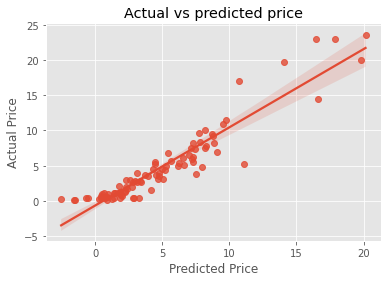

In [87]:
sns.regplot(x=pred, y=Y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()